In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
# Load the dataset
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


a) set a seed (to ensure work reproducibility) and take a random sample of 25 observations and
find the mean Glucose and highest Glucose values of this sample and compare these statistics
with the population statistics of the same variable. You should use charts for this compariso

In [69]:
# Setting seed for reproducibility
np.random.seed(42)
random_sample = data.sample(n=25, random_state=42)
random_sample

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
204,6,103,72,32,190,37.7,0.324,55,0
97,1,71,48,18,76,20.4,0.323,22,0
336,0,117,0,0,0,33.8,0.932,44,0
568,4,154,72,29,126,31.3,0.338,37,0
148,5,147,78,0,0,33.7,0.218,65,0


In [70]:
# Glucose statistics
randomsample_mean_glucose = random_sample['Glucose'].mean()
randomsample_max_glucose = random_sample['Glucose'].max()
#Population statistics
population_mean_glucose = data['Glucose'].mean()
population_max_glucose = data['Glucose'].max()

print(f"Sample Mean Glucose: {randomsample_mean_glucose}")
print(f"Sample Max Glucose: {randomsample_max_glucose}")
print(f"Population Mean Glucose: {population_mean_glucose}")
print(f"Population Max Glucose: {population_max_glucose}")

Sample Mean Glucose: 116.64
Sample Max Glucose: 183
Population Mean Glucose: 120.89453125
Population Max Glucose: 199


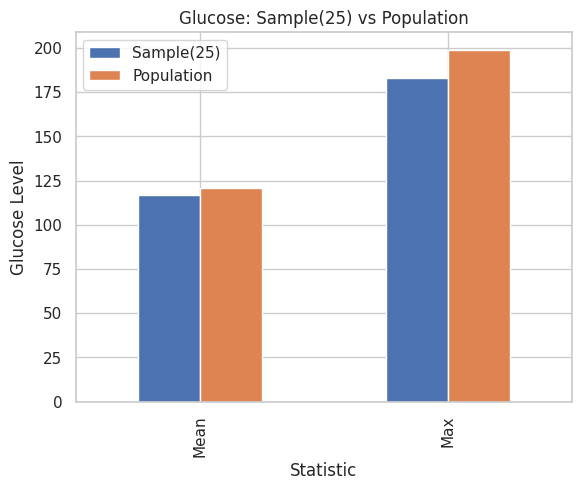

In [71]:
glucose_stats = pd.DataFrame({
    'Statistic': ['Mean', 'Max'],
    'Sample(25)': [randomsample_mean_glucose, randomsample_max_glucose],
    'Population': [population_mean_glucose, population_max_glucose]
})

glucose_stats.set_index('Statistic').plot(kind='bar')
plt.title("Glucose: Sample(25) vs Population")
plt.ylabel("Glucose Level")
plt.show()


Sample 98th Percentile BMI: 40.248
Population 98th Percentile BMI: 47.52599999999996


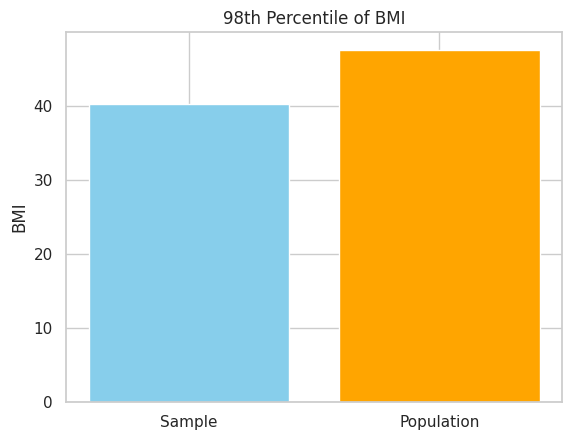

In [72]:
sample_bmi_98 = np.percentile(random_sample['BMI'], 98)
population_bmi_98 = np.percentile(data['BMI'], 98)

print(f"Sample 98th Percentile BMI: {sample_bmi_98}")
print(f"Population 98th Percentile BMI: {population_bmi_98}")

plt.bar(['Sample', 'Population'], [sample_bmi_98, population_bmi_98], color=['skyblue', 'orange'])
plt.title("98th Percentile of BMI")
plt.ylabel("BMI")
plt.show()



c) Using bootstrap (replace= True), create 500 samples (of 150 observation each) from the
population and find the average mean, standard deviation and percentile for BloodPressure and
compare this with these statistics from the population for the same variable. Again, you should
create charts for this comparison. Report on your findings.

In [73]:
# Initializing lists to store bootstrap statistics
bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

# Bootstrap: 500 samples of 150 observations each
for _ in range(500):
    bootstrap_sample = data.sample(n=150, replace=True)
    bp = bootstrap_sample['BloodPressure']
    bootstrap_means.append(bp.mean())
    bootstrap_stds.append(bp.std())
    bootstrap_percentiles.append(np.percentile(bp, 98))

bootstrap_means = np.array(bootstrap_means)
bootstrap_stds = np.array(bootstrap_stds)
bootstrap_percentiles = np.array(bootstrap_percentiles)

# Population statistics
population_bp_mean = data['BloodPressure'].mean()
population_bp_std = data['BloodPressure'].std()
population_bp_98 = np.percentile(data['BloodPressure'], 98)

print("\n--- Bootstrap Statistics for Blood Pressure ---")
print(f"Average of Bootstrap Means: {bootstrap_means.mean():}")
print(f"Standard Deviation of Bootstrap Means: {bootstrap_means.std():}")
print(f"Average of Bootstrap Std Devs: {bootstrap_stds.mean():}")
print(f"Standard Deviation of Bootstrap Std Devs: {bootstrap_stds.std():}")
print(f"Average of Bootstrap 98th Percentiles: {bootstrap_percentiles.mean():}")
print(f"Standard Deviation of Bootstrap 98th Percentiles: {bootstrap_percentiles.std():}")

print("\n--- Population Statistics for Blood Pressure ---")
print(f"Population Mean: {population_bp_mean:}")
print(f"Population Std Dev: {population_bp_std:}")
print(f"Population 98th Percentile: {population_bp_98:}")



--- Bootstrap Statistics for Blood Pressure ---
Average of Bootstrap Means: 69.17692000000001
Standard Deviation of Bootstrap Means: 1.5384716305621122
Average of Bootstrap Std Devs: 19.073717755676082
Standard Deviation of Bootstrap Std Devs: 2.1912899710977047
Average of Bootstrap 98th Percentiles: 97.90244000000003
Standard Deviation of Bootstrap 98th Percentiles: 4.859848027088909

--- Population Statistics for Blood Pressure ---
Population Mean: 69.10546875
Population Std Dev: 19.355807170644777
Population 98th Percentile: 99.31999999999994


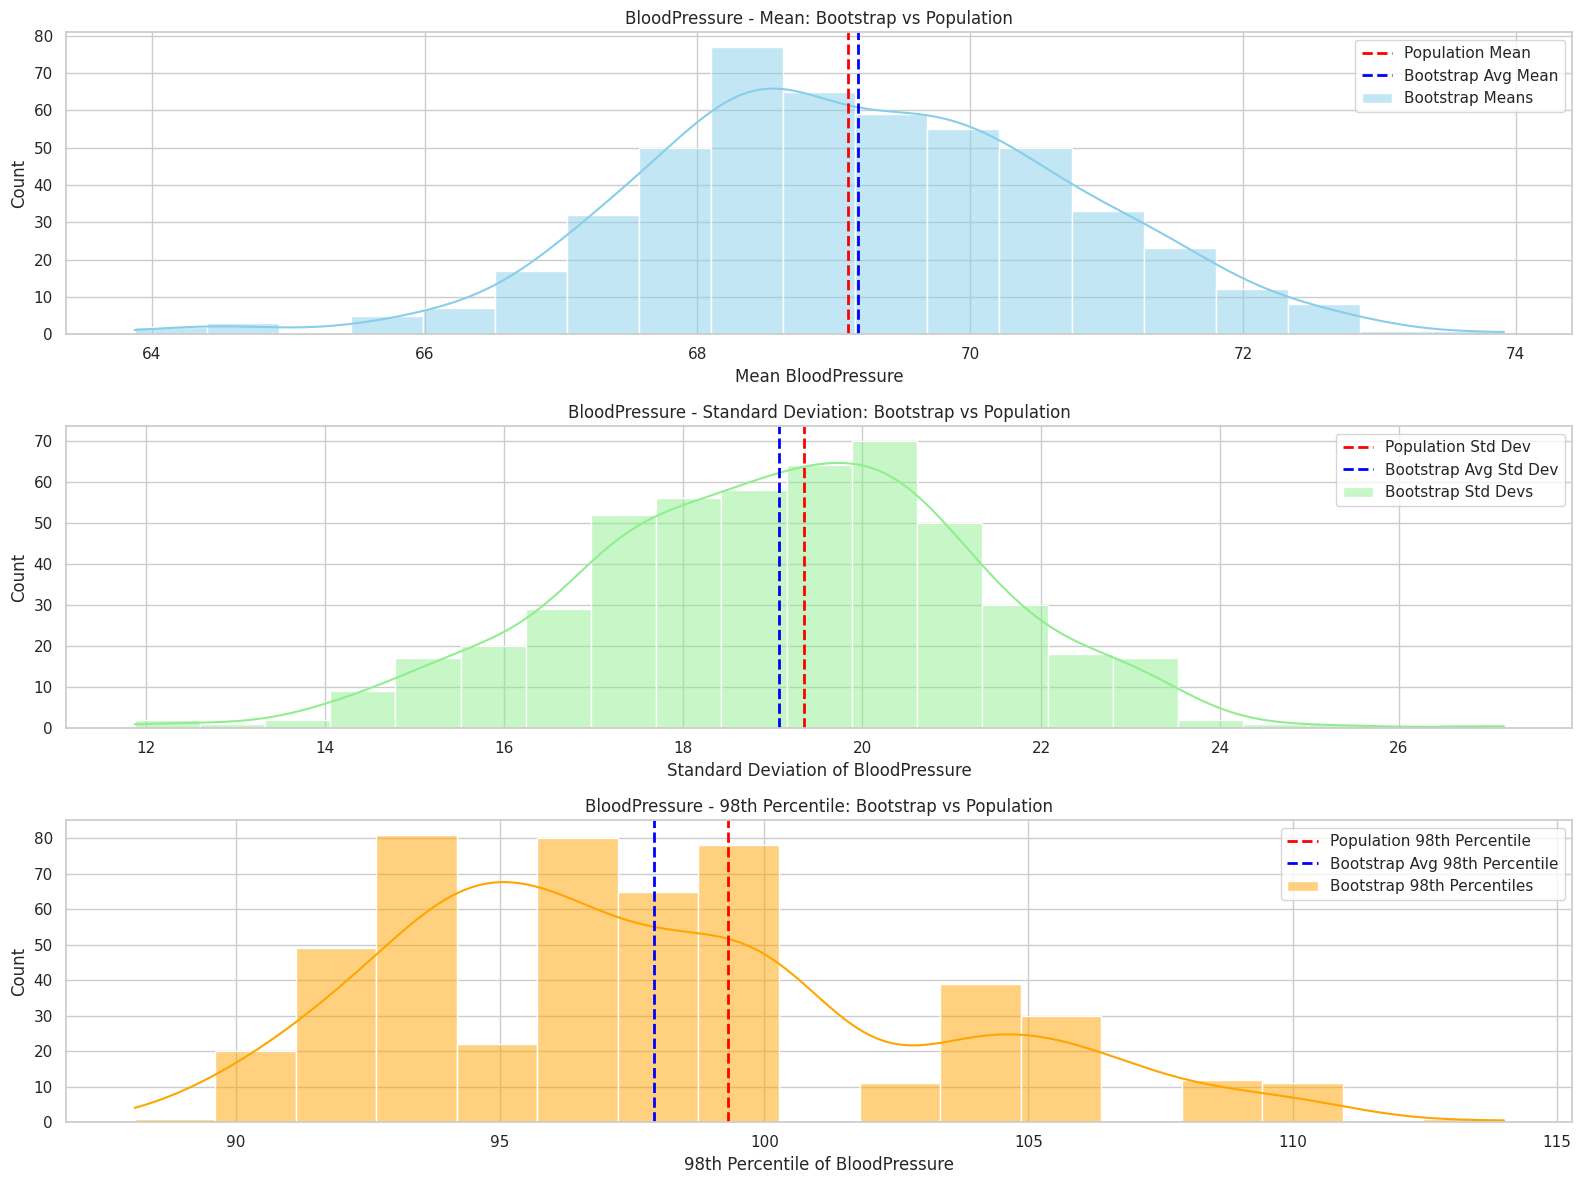

In [74]:
plt.figure(figsize=(16, 12))

# Mean
plt.subplot(3, 1, 1)
sns.histplot(bootstrap_means, kde=True, color="skyblue", label="Bootstrap Means")
plt.axvline(population_bp_mean, color='red', linestyle='--', linewidth=2, label='Population Mean')
plt.axvline(bootstrap_means.mean(), color='blue', linestyle='--', linewidth=2, label='Bootstrap Avg Mean')
plt.title("BloodPressure - Mean: Bootstrap vs Population")
plt.xlabel("Mean BloodPressure")
plt.legend()

# Standard Deviation
plt.subplot(3, 1, 2)
sns.histplot(bootstrap_stds, kde=True, color="lightgreen", label="Bootstrap Std Devs")
plt.axvline(population_bp_std, color='red', linestyle='--', linewidth=2, label='Population Std Dev')
plt.axvline(bootstrap_stds.mean(), color='blue', linestyle='--', linewidth=2, label='Bootstrap Avg Std Dev')
plt.title("BloodPressure - Standard Deviation: Bootstrap vs Population")
plt.xlabel("Standard Deviation of BloodPressure")
plt.legend()

# 98th Percentile
plt.subplot(3, 1, 3)
sns.histplot(bootstrap_percentiles, kde=True, color="orange", label="Bootstrap 98th Percentiles")
plt.axvline(population_bp_98, color='red', linestyle='--', linewidth=2, label='Population 98th Percentile')
plt.axvline(bootstrap_percentiles.mean(), color='blue', linestyle='--', linewidth=2, label='Bootstrap Avg 98th Percentile')
plt.title("BloodPressure - 98th Percentile: Bootstrap vs Population")
plt.xlabel("98th Percentile of BloodPressure")
plt.legend()

plt.tight_layout()
plt.show()


#REPORTS

Interpretations:


a) The sample mean glucose (116.64) is slightly lower than the population mean (120.89), showing minor deviation and the highest glucose value (183) is also below the population maximum (199), missing the extreme. This reflects how small samples may not fully capture population variability, especially for maximum values.

b)The sample of 98th percentile BMI (40.25) is significantly lower than the populations (47.53), indicating fewer extreme BMI values in the sample. so the sample may suggest as not fully represent the higher end of BMI values present in the population.

c)The bootstrap distribution of mean BloodPressure is very close to the population mean as we can see in the above graph, indicating accurate estimation through resampling.and the standard deviation distribution also closely aligns with the population standard deviationas we can see in the above graph, though with a slightly wider spread, reflecting natural variability.And for the 98th percentile, the bootstrap values are somewhat lower and more dispersed compared to the population's, suggesting a slight underestimation of extreme high values.All graphs aree showing as that bootstrap sampling is effective in capturing central tendency and spread, though it may slightly underestimate rare extremes.Overall, the plots visually confirm that bootstrap statistics are reliable approximations of population metrics.